# Q1: Write your own LCG random generator with the following set of parameters
 * a = 1103515245
 * c = 12345
 * m = 32768.

In [9]:
from library.random import LCG
# Please go into the file random.py inside the folder 
# library to see the implementation of the LCG algorithm.
LCG(0.1)  # Showing how to use the LCG function

0.0380096435546875

Relevant Library file used here: [library/random.py](library/random.py)

# Q2: Calculate the volume of that part of a sphere of unit radius, centered at origin,which is in the First quadrant by throwing method.

In [10]:
from library.basic_arithmatic import distance
from tqdm import tqdm  # Just helps us get a progress bar for loops
from math import pi  # Used for comparizon purposes only

In [11]:
N = 10**6
seed = 0.74

inside = 0

for i in tqdm(range(N)):
    # Generate a random point on the 3D space
    point = []
    for i in range(3):
        seed = LCG(seed)
        point.append(seed)
    if distance(point, [0]*len(point)) < 1:
        inside += 1

print(f"volume = {inside/N} units, which is almost equal to pi/6 (={round(pi/6, 6)})")

# print(pi*N/inside)  # value of this should come close to 6

100%|██████████| 1000000/1000000 [00:05<00:00, 195297.83it/s]

volume = 0.523603 units, which is almost equal to pi/6 (=0.523599)


# Q3: Random Walk

In [12]:
from library.random import random_walk
from library.basic_arithmatic import RMS

100%|██████████| 300/300 [00:00<00:00, 150028.76it/s]


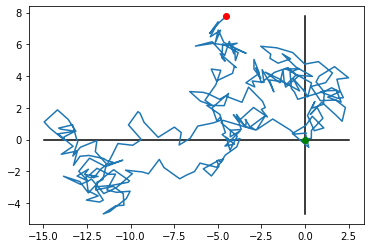

In [13]:
points, dist = random_walk(steps=300, seed=0.5)

100%|██████████| 600/600 [00:00<00:00, 299914.48it/s]


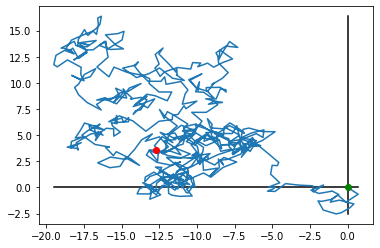

In [14]:
points, dist = random_walk(steps=600, seed=0.45)

100%|██████████| 900/900 [00:00<00:00, 224989.49it/s]


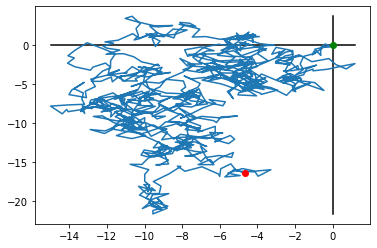

In [15]:
points, dist = random_walk(steps=900, seed=0.4)

In [16]:
N = 10**4
RMS_dist = 0
disp = 0
steps = 300  # Change this for walks of different steps
for i in tqdm(range(N)):
    points, dist = random_walk(
                        steps = steps,
                        seed = i/N,
                        plot=False
                    )
    RMS_dist += RMS(dist)

    disp += distance(points[-1], [0]*len(points[-1]))/steps

mean_RMS_dist = RMS_dist/N
mean_disp = disp/N

print(mean_RMS_dist/mean_disp)

100%|██████████| 10000/10000 [00:13<00:00, 750.75it/s]

18.859445687908092


In [17]:
print(mean_RMS_dist/(mean_disp*steps**0.5))

1.0888506044680863


# Making GIF
### At this point, the assignment is probably complete. But I wanted to plot the data, animate it and see if it is a good representation of the random walk

Click on this link to view the GIF Created with the following code: [random_walk.gif](random_walk.gif)

100%|██████████| 202/202 [00:05<00:00, 40.17it/s]


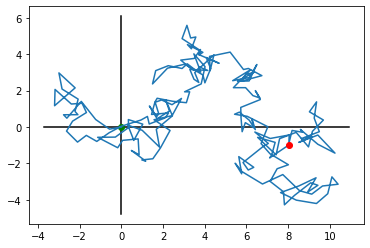

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from library.random import random_walk
from tqdm import tqdm
points, dist = random_walk(steps=200, seed=0.52, plot = False)
pointsx, pointsy = zip(*points)


fig = plt.figure()
# Axes
plt.plot([max(pointsx)+0.5, min(pointsx)-0.5], [0, 0], '#000000')  # x-axis
plt.plot([0, 0], [max(pointsy)+0.5, min(pointsy)-0.5], '#000000')  # y-axis

plt.plot(pointsx[0], pointsy[0], "go")  # starting point
l, = plt.plot([], [])

metadata = dict(title='Movie', artist='codinglikemad')
writer = PillowWriter(fps=15, metadata=metadata)

with writer.saving(fig, "random_walk.gif", 100):
    
    # updating the different frames
    for i in tqdm(range(len(points)+1)):
        l.set_data(pointsx[:i], pointsy[:i])
        writer.grab_frame()
        
    # add the last point
    plt.plot(pointsx[-1], pointsy[-1], "ro")
    
    # Adding delay at the end of the gif
    for i in range(20):
        writer.grab_frame()